<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Regression_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is the main difference between regression and classification?
If you look at the classifier examples shared earlier, you will find that regression models predict a continuous variable as opposed to a class. So, in classifiers, we "classify" things so that they are in different classes. We first used a logsitic regression to [classify students](https://github.com/tawfiqam/MI564/blob/main/Logistic_Regression_Classifier_Intro.ipynb) accepted (class 1) to a program and those who are not (class 2). We used a random forest classifier to [differentiate different types of wine](https://github.com/tawfiqam/MI564/blob/main/Random_Forest_Intro.ipynb). We also used a Naive Bayes classifier to [classify posts to two different online communities](https://github.com/tawfiqam/MI564/blob/main/Naive_Bayes_Intro.ipynb).

With regression, we will predict a value. As I laid out before, this value represents a continous variable. A continous variable can take on an uncountable set of values. So while classifiers used discrete variables (basically integers - [0,1,2,3]), regression gets us a predicted continous variable - usually including a fraction [0,0.345,100.45].

##Regression Evaluation Metrics

Remember that we used evaluation metrics for classifiers including accuracy, precision, recall, F1 score, and ROC curves when working with classifiers. But these will not work here because, again, we are not classifying into discrete groups, but predicting specific numbers. 

There are two metrics used to evaluate regression models:

**R-squared**: R-squared values range between 0 and 1. They are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables. The higher the R-squared the better the model.

**Root Mean Squared Error (RMSE)**: measures the average magnitude of the residuals or error. What is the error? This is the difference between our prediction and the actual value. 

Ideally, lower RMSE and higher R-squared values are indicative of a good model. 



In [1]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [2]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

We are going to use the Boston Housing Data in our analysis

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:
    0. CRIM      per capita crime rate by town
    1. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    2. INDUS     proportion of non-retail business acres per town
    3. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    4. NOX       nitric oxides concentration (parts per 10 million)
    5. RM        average number of rooms per dwelling
    6. AGE       proportion of owner-occupied units built prior to 1940
    7. DIS       weighted distances to five Boston employment centres
    8. RAD       index of accessibility to radial highways
    9. TAX      full-value property-tax rate per $10,000
    10. PTRATIO  pupil-teacher ratio by town
    11. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
by town
    12. LSTAT    % lower status of the population
    13. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [3]:
import numpy as np
import pandas as pd
#import the R^2 metric
from sklearn.metrics import r2_score
#import the mean_square_error metric
from sklearn.metrics import mean_squared_error

#import the SVM regressor
from sklearn.svm import SVR
#import the Ridge regressor
from sklearn.linear_model import Ridge
#import the Lasso regressor
from sklearn.linear_model import Lasso
#import the Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
#import the linear regressor
from sklearn.linear_model import LinearRegression
#import the Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

#import matplotlib for graphing
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})

# load the dataset
# this url holds a dataset saved as a csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

df = pd.read_csv(url, header=None)

In [4]:
#let's take a look at the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#now break it down to data (the features or predictors)
data = df[df.columns[0:12]]
#and the target, which in this case is 13
#MEDV Median value of owner-occupied homes in $1000's
target = df[df.columns[13]]

In [6]:
#Now let's take a look at our features
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000


In [7]:
#and our targets
target[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: 13, dtype: float64

In [8]:
# Separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [9]:
X_train[0:2]

,0,1,2,3,4,5,6,7,8,9,10,11
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96


In [10]:
y_train[0:5]

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
Name: 13, dtype: float64

In [11]:
#Since the features are of different magnitudes (e.g., crime per capita and average # of rooms in a house)
#so, we use the sklearn scaling function
#if you want to know more, you can check this forum: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#note that the training and testing data are scaled separetely so
#they don't affect each other. You do not want the training data to leak to the test data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
X_train[0:2]

array([[-0.20735619, -0.49997924,  1.54801583, -0.26360274,  0.58821309,
        -1.83936729,  1.10740225, -1.1251102 , -0.61816013,  0.20673466,
         1.2272573 ,  0.42454294],
       [-0.38886492,  0.34677427, -0.58974728, -0.26360274, -0.79782145,
         0.32748658, -0.36766106,  0.07509   , -0.73363701, -1.04949303,
         0.05696346,  0.40185312]])

In [13]:
# create target scaler object
# Now, let's scale our target, the median value of the house in 1000s
target_scaler = StandardScaler()
#we need to reshape because this is one variable
target_scaler.fit(y_train.to_numpy().reshape(-1,1))
y_train = target_scaler.transform(y_train.to_numpy().reshape(-1,1))
y_test = target_scaler.transform(y_test.to_numpy().reshape(-1,1))

In [14]:
y_train[0:5]

array([[-0.90645092],
       [ 0.17970697],
       [-0.5045725 ],
       [-0.02666303],
       [-0.24389461]])

In [15]:
#now let's fit all the numbers into one array using the ravel function
y_train = y_train.ravel()
y_test = y_test.ravel()

In [16]:
y_train[0:5]

array([-0.90645092,  0.17970697, -0.5045725 , -0.02666303, -0.24389461])

##Linear Regression

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.
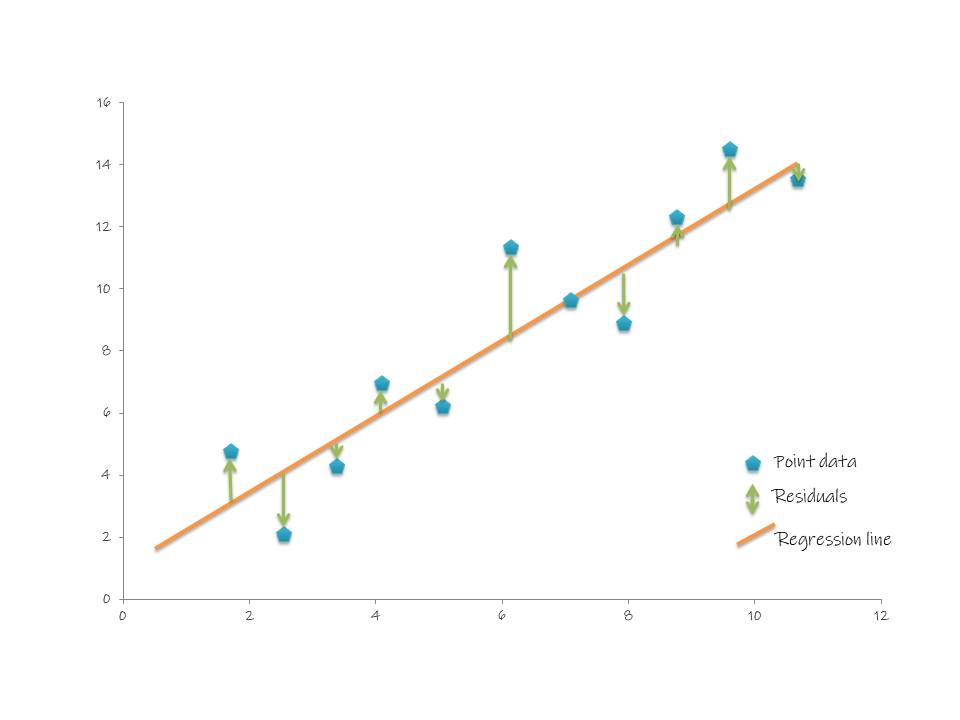

So, in the figure above, the MSE is the sum of the squared distances (residuals or errors) colored in grey. The lower the number, the lower error, thus the better model

In [17]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

0.5744787579615156
0.6465262120165035


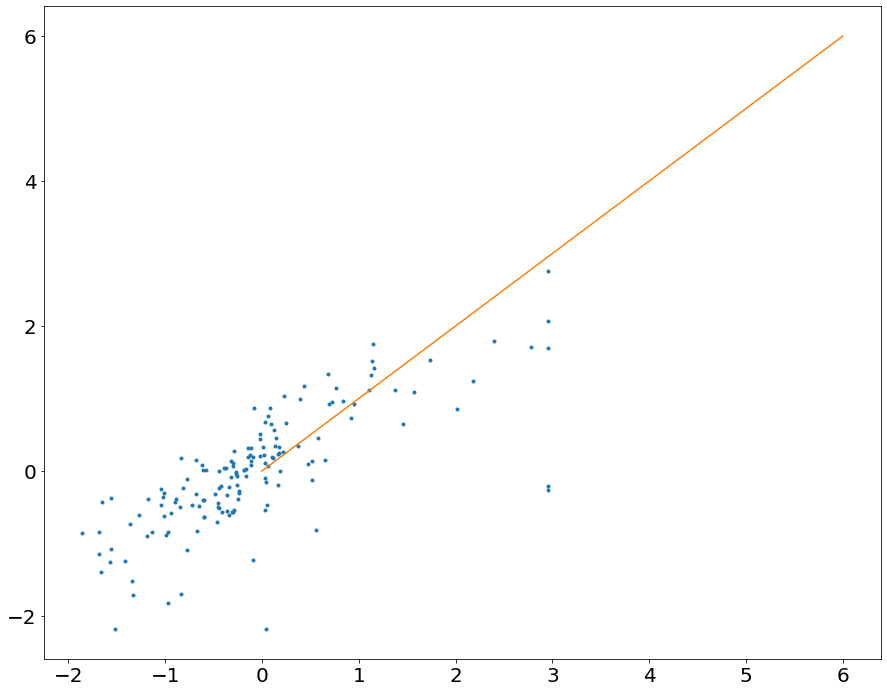

In [18]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 6, 6)
y = x
plt.plot(x, y)
plt.show()

##Ridge Regression

Ridge regression is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters. 

Source:
https://en.wikipedia.org/wiki/Tikhonov_regularization

In [19]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = Ridge()
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

0.5740182242513445
0.6468759790407583


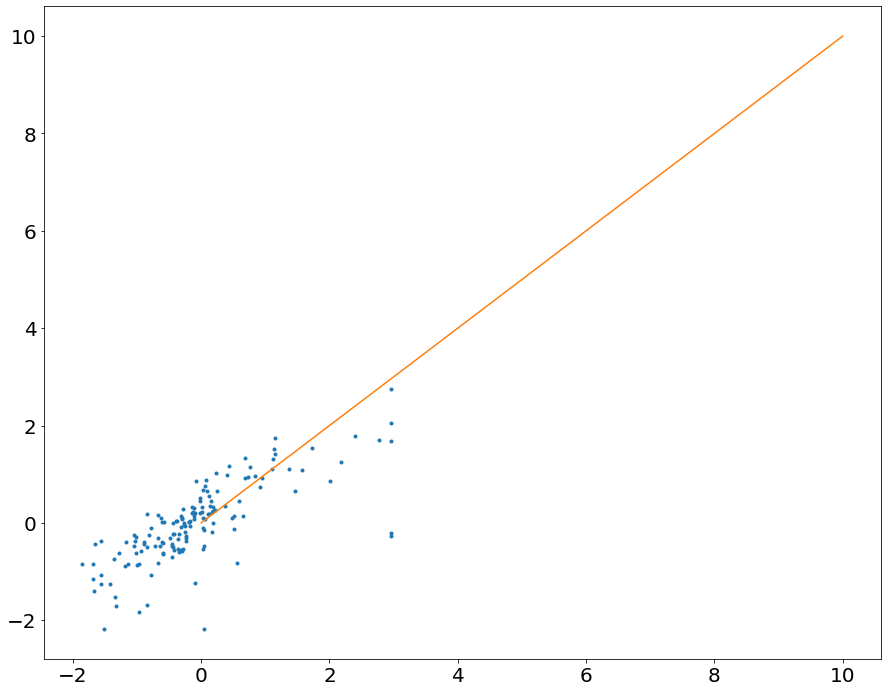

In [20]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

##Lasso Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 

The regularization is a penalty applied to the features. Basically, this is a penalty added to make sure that the regression does not overfit. 

Source:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [21]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = Lasso()
# 2. Use fit
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

-0.006019731947687124
0.994097002178065


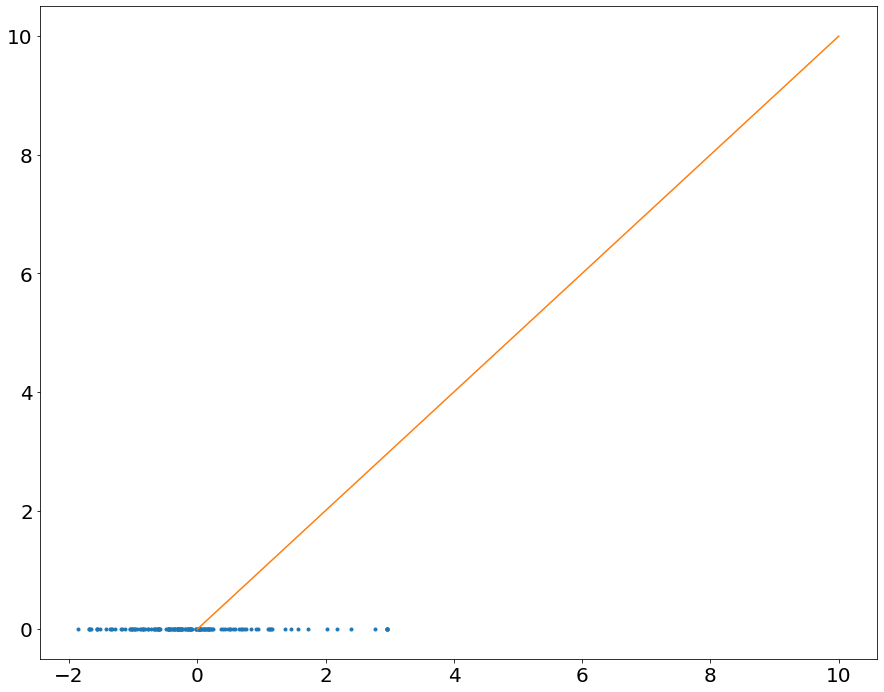

In [22]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

##Decision Tree Regressor

Remember when we introduced the [Decision Tree Classifier](https://github.com/tawfiqam/MI564/blob/main/Decision_Tree_Intro.ipynb) last week, we talked about it can be used for classification or regression. 

In [23]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = DecisionTreeRegressor()
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

0.3627162636165524
0.7912103000216458


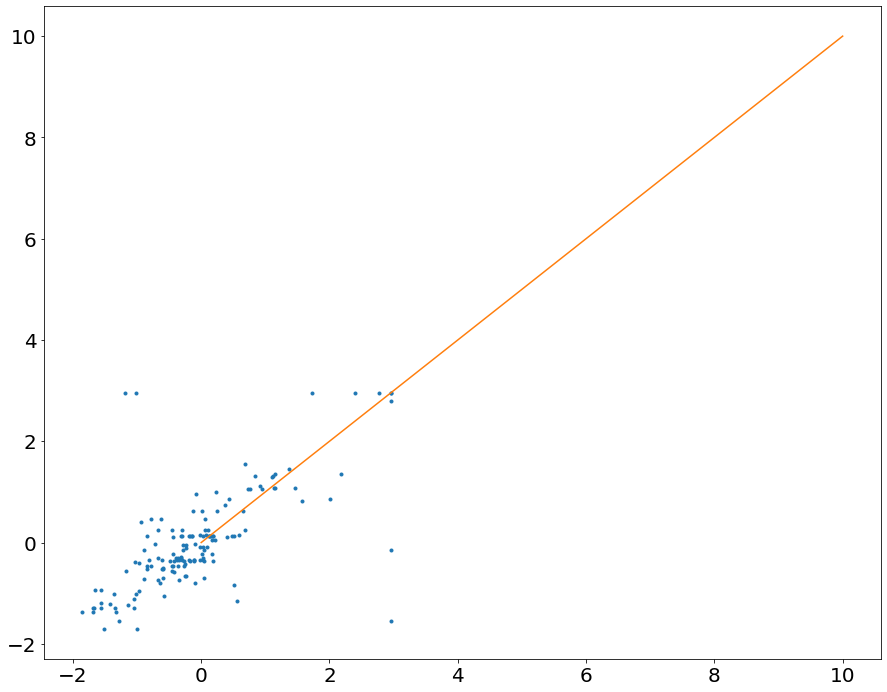

In [24]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

##Random Forest Regressor
Remember when we introduced the [random forest classifier](https://github.com/tawfiqam/MI564/blob/main/Random_Forest_Intro.ipynb) last week, we talked about it can be used for classification or regression. 

Let's take a look at the regressor. 

In [25]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = RandomForestRegressor()
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

0.6499070737677758
0.586431354499502


## SVM Regressor

Remember when we introduced the [Support Vector Machines](https://github.com/tawfiqam/MI564/blob/main/SVM_Intro.ipynb) last week, we talked about it can be used for classification or regression. 

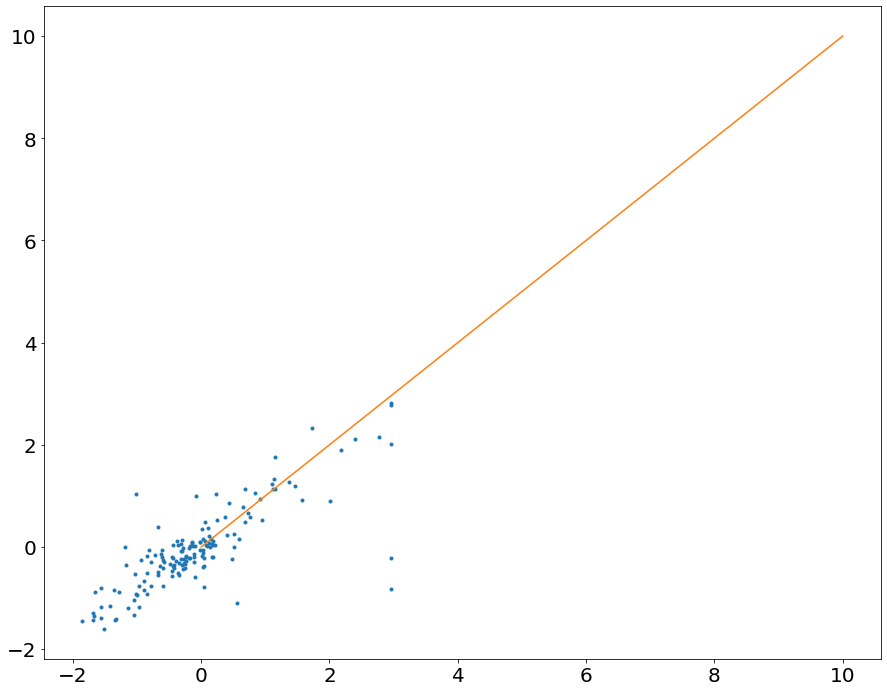

In [26]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

In [27]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = SVR(kernel='rbf')
# 2. Fit the model
model.fit(X_train, y_train)
# 3. Get the predictions
y_pred = model.predict(X_test) 
# 4. Get the R^2
print(r2_score(y_test, y_pred))
# 5. Get the RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred))) 

0.6705836286893923
0.5688504475153567


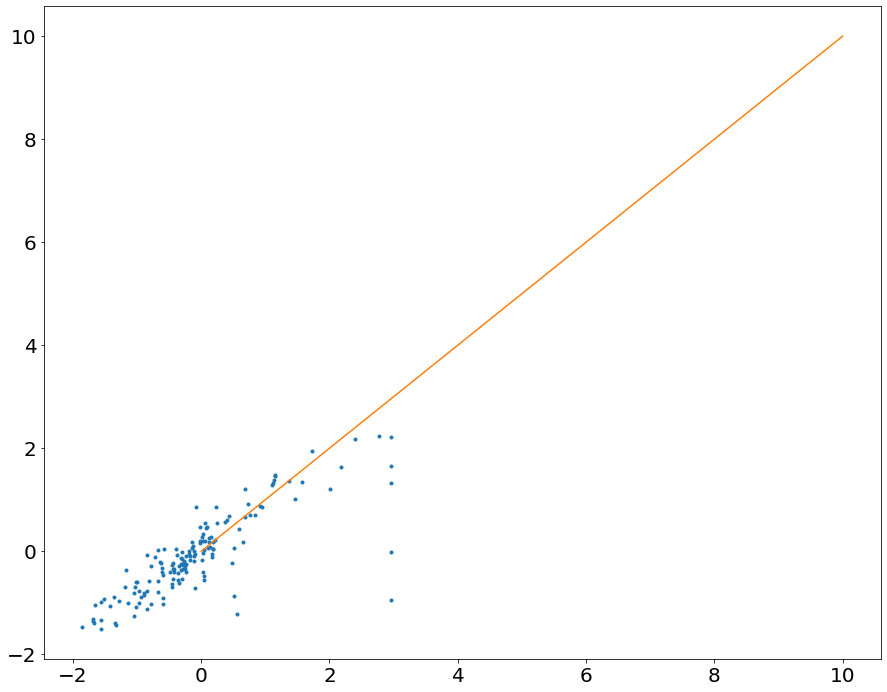

In [28]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 10)
y = x
plt.plot(x, y)
plt.show()

##Which is the best regressor of the models introduced in this example? 

Sources:
[1] https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

[2] https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

[3] https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial

[4] https://machinelearningmastery.com/lasso-regression-with-python/

[5] https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/